<a href="https://colab.research.google.com/github/dafini05/COVID-19-DETECTION-USING-DL-ML-TECHNIQUES/blob/main/Covid_19_detection_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

### Downloading Dataset

In [2]:
!kaggle datasets download -d jahidhasanco/covid19-pneumonia-normal-chest-x-ray-pa-dataset

Dataset URL: https://www.kaggle.com/datasets/jahidhasanco/covid19-pneumonia-normal-chest-x-ray-pa-dataset
License(s): other
100% 1.34G/1.34G [01:26<00:00, 16.7MB/s]
100% 1.34G/1.34G [01:26<00:00, 16.7MB/s]


### Upzip Dataset

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-pneumonia-normal-chest-x-ray-pa-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
len(os.listdir('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid'))

1525

In [5]:
len(os.listdir('/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/normal'))

1525

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np

In [8]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (256, 256))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [9]:
covid_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/covid"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [11]:
normal_path = "/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset/normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [12]:
data = np.r_[covidImages, normalImages]

In [13]:
targets = np.r_[covidTargets, normalTargets]

In [14]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.30, random_state= 0)

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=8,validation_data=(x_test, y_test))

NameError: name 'x_train' is not defined

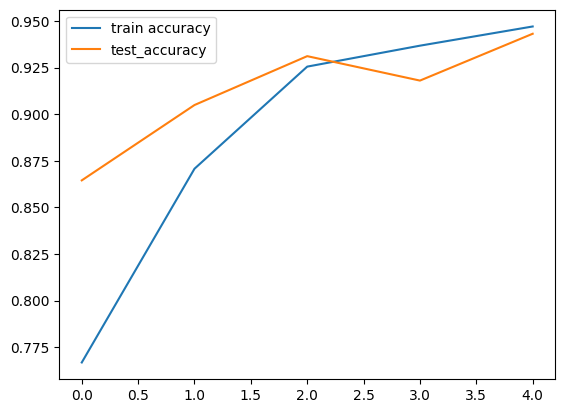

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

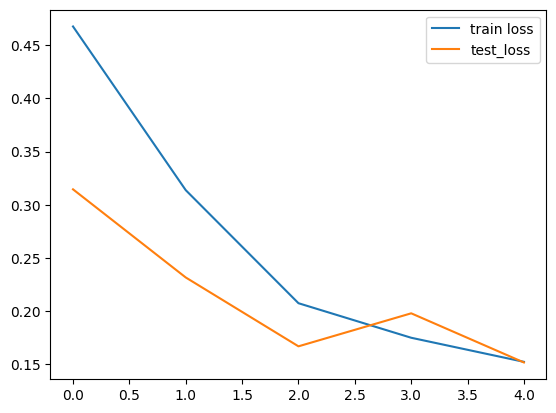

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()